In [1]:
# diffusion policy zarr fromat to robomimic hdf5 format

In [1]:
import numpy as np
import zarr 
import h5py
from matplotlib import pyplot as plt

In [2]:
dataset_path = "data/pusht/pusht_cchi_v7_replay.zarr"
dataset_zarr = zarr.open(dataset_path, 'r')

for key in dataset_zarr.keys():
    print(key )

for key in dataset_zarr['meta']:
    print('meta:', key, dataset_zarr['meta'][key].shape)

for key in dataset_zarr['data'].keys():
    print('data:', key, dataset_zarr['data'][key].shape) 

data
meta
meta: episode_ends (206,)
data: action (25650, 2)
data: img (25650, 96, 96, 3)
data: keypoint (25650, 9, 2)
data: n_contacts (25650, 1)
data: state (25650, 5)


In [3]:
episode_ends=dataset_zarr['meta']['episode_ends'][:]
action=dataset_zarr['data']['action'][:]
img=dataset_zarr['data']['img'][:].astype(np.uint8)
keypoint=dataset_zarr['data']['keypoint'][:]
n_contacts=dataset_zarr['data']['n_contacts'][:]
state=dataset_zarr['data']['state'][:]

In [4]:
episode_starts = np.concatenate(([0], episode_ends[:-1]))

In [5]:
episode_starts[:10], episode_ends[:10]

(array([   0,  161,  279,  420,  579,  738,  895,  964, 1133, 1213]),
 array([ 161,  279,  420,  579,  738,  895,  964, 1133, 1213, 1347]))

In [6]:
episode_starts[-5:], episode_ends[-5:]

(array([25059, 25151, 25318, 25468, 25601]),
 array([25151, 25318, 25468, 25601, 25650]))

In [7]:
def get_episode(episode_idx):
    start = episode_starts[episode_idx]
    end = episode_ends[episode_idx]
    actions=action[start:end]
    dactions = np.diff(actions, axis=0)
    dactions = np.concatenate([dactions, np.zeros((1, 2))], axis=0)
    return {
        'action': action[start:end],
        'daction': dactions,
        'img': img[start:end],
        'keypoint': keypoint[start:end],
        'n_contacts': n_contacts[start:end],
        'state': state[start:end],
        'agent_pos': state[start:end, :2],
    }

In [8]:
episode = get_episode(0)
episode['action'].shape, episode['daction'].shape, episode['img'].shape

((161, 2), (161, 2), (161, 96, 96, 3))

In [9]:
n_episode=len(episode_starts)
n_episode

206

In [10]:
hdf5_file_name='pusht_v7_zarr_206.hdf5'

env_args = "" 
f_sub = h5py.File(hdf5_file_name, "w")
f_sub.create_group("data")
f_sub.create_group("mask")
f_sub["data"].attrs["env_args"] = env_args
f_sub.close()

In [11]:
for demo_no in range(n_episode):
    episode = get_episode(demo_no)

    demo_group=f"/data/demo_{demo_no}"
    print(f'saving demo {demo_group} to {hdf5_file_name}')
    with h5py.File(hdf5_file_name, 'a') as hf:
        group = hf.create_group(demo_group) 
        group.attrs['num_samples'] = episode['action'].shape[0]
        group.create_dataset('obs/img', data=episode['img'])      
        group.create_dataset('obs/state', data=episode['state'])
        group.create_dataset('obs/keypoint', data=episode['keypoint'])
        group.create_dataset('obs/n_contacts', data=episode['n_contacts'])
        group.create_dataset('obs/agent_pos', data=episode['agent_pos'])
        group.create_dataset('daction', data=episode['daction'])
        group.create_dataset('action', data=   episode['action'])

saving demo /data/demo_0 to pusht_v7_zarr_206.hdf5
saving demo /data/demo_1 to pusht_v7_zarr_206.hdf5
saving demo /data/demo_2 to pusht_v7_zarr_206.hdf5
saving demo /data/demo_3 to pusht_v7_zarr_206.hdf5
saving demo /data/demo_4 to pusht_v7_zarr_206.hdf5
saving demo /data/demo_5 to pusht_v7_zarr_206.hdf5
saving demo /data/demo_6 to pusht_v7_zarr_206.hdf5
saving demo /data/demo_7 to pusht_v7_zarr_206.hdf5
saving demo /data/demo_8 to pusht_v7_zarr_206.hdf5
saving demo /data/demo_9 to pusht_v7_zarr_206.hdf5
saving demo /data/demo_10 to pusht_v7_zarr_206.hdf5
saving demo /data/demo_11 to pusht_v7_zarr_206.hdf5
saving demo /data/demo_12 to pusht_v7_zarr_206.hdf5
saving demo /data/demo_13 to pusht_v7_zarr_206.hdf5
saving demo /data/demo_14 to pusht_v7_zarr_206.hdf5
saving demo /data/demo_15 to pusht_v7_zarr_206.hdf5
saving demo /data/demo_16 to pusht_v7_zarr_206.hdf5
saving demo /data/demo_17 to pusht_v7_zarr_206.hdf5
saving demo /data/demo_18 to pusht_v7_zarr_206.hdf5
saving demo /data/demo

### load hdf5 file

In [12]:
hdf5_file_name='pusht_v7_zarr_206.hdf5'

f=h5py.File(hdf5_file_name, 'r')
print(f.keys())
print(f['data'].keys())
print(f['data']['demo_1'].keys())
print(f['data']['demo_1']['obs'].keys())
print(f['data']['demo_1']['obs']['img'].shape)
print(f['data']['demo_1']['obs']['state'].shape)

<KeysViewHDF5 ['data', 'mask']>
<KeysViewHDF5 ['demo_0', 'demo_1', 'demo_10', 'demo_100', 'demo_101', 'demo_102', 'demo_103', 'demo_104', 'demo_105', 'demo_106', 'demo_107', 'demo_108', 'demo_109', 'demo_11', 'demo_110', 'demo_111', 'demo_112', 'demo_113', 'demo_114', 'demo_115', 'demo_116', 'demo_117', 'demo_118', 'demo_119', 'demo_12', 'demo_120', 'demo_121', 'demo_122', 'demo_123', 'demo_124', 'demo_125', 'demo_126', 'demo_127', 'demo_128', 'demo_129', 'demo_13', 'demo_130', 'demo_131', 'demo_132', 'demo_133', 'demo_134', 'demo_135', 'demo_136', 'demo_137', 'demo_138', 'demo_139', 'demo_14', 'demo_140', 'demo_141', 'demo_142', 'demo_143', 'demo_144', 'demo_145', 'demo_146', 'demo_147', 'demo_148', 'demo_149', 'demo_15', 'demo_150', 'demo_151', 'demo_152', 'demo_153', 'demo_154', 'demo_155', 'demo_156', 'demo_157', 'demo_158', 'demo_159', 'demo_16', 'demo_160', 'demo_161', 'demo_162', 'demo_163', 'demo_164', 'demo_165', 'demo_166', 'demo_167', 'demo_168', 'demo_169', 'demo_17', 'demo

In [13]:
len(f['data'].keys())

206

In [14]:
img=f['data']['demo_1']['obs']['img'][:] 
img.shape

(118, 96, 96, 3)

In [15]:
img0=img[10].astype(np.uint8)
np.min(img0), np.max(img0)  

(65, 255)

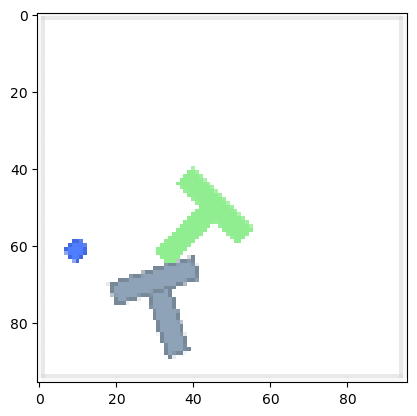

In [16]:
plt.imshow(img0)

In [17]:
import imageio 
imageio.mimsave('pusht_v7_zarr_206.mp4', img,  fps=10)